In [27]:
# Load the dataset and display initial rows

import pandas as pd
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

# Load the dataset
df = pd.read_csv('Mall_Customers.csv')  # Replace 'filename.csv' with your actual file name

# Display the initial rows
df.head()

Saving Mall_Customers.csv to Mall_Customers (2).csv


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [28]:
# Explore the dataset structure and summary statistics

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [29]:
# Preprocess the data: handle missing values and encode categorical variables

# Check for missing values
missing_values = df.isnull().sum()

# Encode the 'Genre' column
df['Genre'] = df['Genre'].map({'Male': 0, 'Female': 1})

# Display the updated dataset
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [30]:
# Select relevant features for segmentation

# Define features for clustering
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Display the selected features
features.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

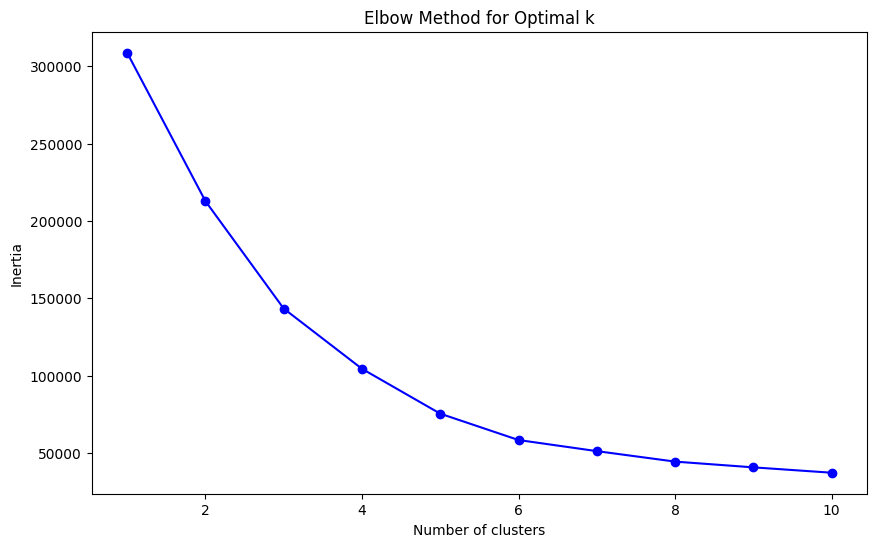

In [31]:
# Apply K-Means clustering algorithm

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the Elbow method
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [32]:
# Apply K-Means clustering with the optimal number of clusters

# Choose the optimal number of clusters (let's say it's 5 for this example)
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
df['Cluster'] = kmeans.fit_predict(features)

# Display the dataset with cluster labels
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,0,19,15,39,0
1,2,0,21,15,81,3
2,3,1,20,16,6,0
3,4,1,23,16,77,3
4,5,1,31,17,40,0


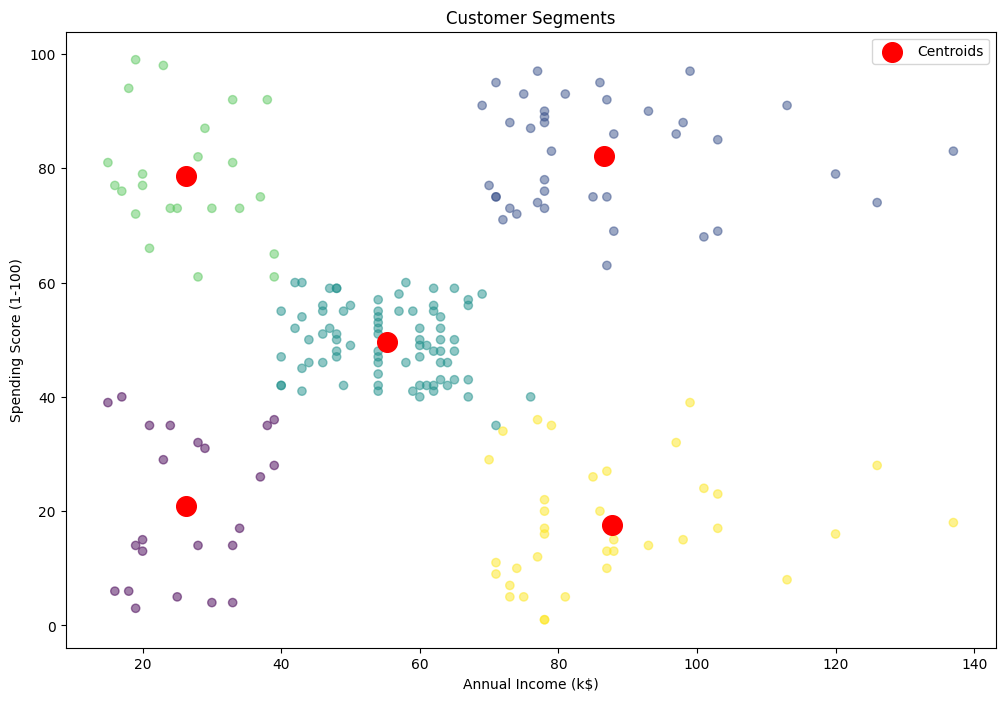

In [33]:
# Evaluate clustering results and visualize the clusters

# Get cluster centroids
centroids = kmeans.cluster_centers_

# Create a DataFrame for visualization
centroids_df = pd.DataFrame(centroids, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])

# Plotting the clusters
plt.figure(figsize=(12, 8))
plt.scatter(features['Annual Income (k$)'], features['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis', alpha=0.5)
plt.scatter(centroids_df['Annual Income (k$)'], centroids_df['Spending Score (1-100)'], c='red', s=200, label='Centroids')
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [34]:
# Summarize the characteristics of each customer segment

segment_summary = df.groupby('Cluster').agg({
    'Age': ['mean', 'std'],
    'Annual Income (k$)': ['mean', 'std'],
    'Spending Score (1-100)': ['mean', 'std'],
    'CustomerID': 'count'
}).reset_index()

segment_summary.columns = ['Cluster', 'Age Mean', 'Age Std', 'Income Mean', 'Income Std', 'Spending Score Mean', 'Spending Score Std', 'Count']
print(segment_summary)

   Cluster   Age Mean    Age Std  Income Mean  Income Std  \
0        0  45.217391  13.228607    26.304348    7.893811   
1        1  32.692308   3.728650    86.538462   16.312485   
2        2  43.088608  16.478572    55.291139    8.710665   
3        3  25.521739   5.273170    26.304348    7.893811   
4        4  40.666667  11.496583    87.750000   16.387059   

   Spending Score Mean  Spending Score Std  Count  
0            20.913043           13.017167     23  
1            82.128205            9.364489     39  
2            49.569620            6.242295     79  
3            78.565217           10.953729     23  
4            17.583333           10.204691     36  


<ipython-input-35-f711959a8ead>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-35-f711959a8ead>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




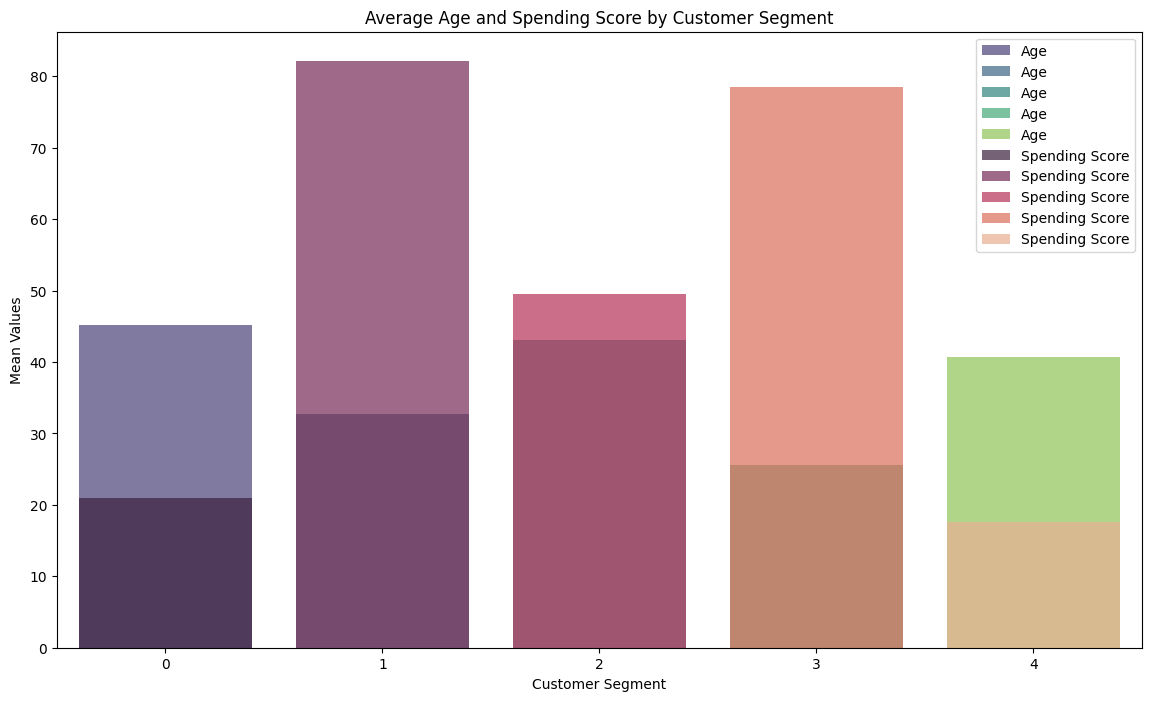

In [35]:
# Visualize the characteristics of each customer segment

import seaborn as sns

plt.figure(figsize=(14, 8))

# Plotting Age and Spending Score mean for each segment
sns.barplot(x='Cluster', y='Age Mean', data=segment_summary, palette='viridis', alpha=0.7, label='Age')
sns.barplot(x='Cluster', y='Spending Score Mean', data=segment_summary, palette='rocket', alpha=0.7, label='Spending Score')

plt.title('Average Age and Spending Score by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Mean Values')
plt.legend()
plt.show()

In [36]:
# Create an interactive dashboard for customer segments using Plotly

import plotly.express as px

# Create an interactive scatter plot
fig = px.scatter(df,
                 x='Annual Income (k$)',
                 y='Spending Score (1-100)',
                 color='Cluster',
                 hover_data=['Age', 'Genre'],
                 title='Customer Segmentation Analysis',
                 labels={'Annual Income (k$)': 'Annual Income (k$)',
                         'Spending Score (1-100)': 'Spending Score'},
                 color_continuous_scale=px.colors.sequential.Viridis)

# Show the dashboard
fig.show()

In [37]:
# Save the summarized segment data to a CSV file

segment_summary.to_csv('customer_segment_summary.csv', index=False)

# Optionally, save the figure as an HTML file for the dashboard
fig.write_html('customer_segmentation_dashboard.html')

In [38]:
# Provide a summary and insights from the customer segmentation analysis

summary = """
Customer Segmentation Analysis Summary:
1. We performed customer segmentation using K-Means clustering based on age, annual income, and spending score.
2. The Elbow method helped identify the optimal number of clusters.
3. The analysis revealed distinct customer segments, each with unique characteristics in terms of age, income, and spending behavior.
4. Insights from this segmentation can guide marketing strategies, personalized offers, and product recommendations tailored to each segment.

Overall, this analysis enhances our understanding of customer behavior, allowing for more effective targeting and engagement.
"""

print(summary)


Customer Segmentation Analysis Summary:
1. We performed customer segmentation using K-Means clustering based on age, annual income, and spending score.
2. The Elbow method helped identify the optimal number of clusters.
3. The analysis revealed distinct customer segments, each with unique characteristics in terms of age, income, and spending behavior.
4. Insights from this segmentation can guide marketing strategies, personalized offers, and product recommendations tailored to each segment.

Overall, this analysis enhances our understanding of customer behavior, allowing for more effective targeting and engagement.



In [39]:
# Finalizing the project

def run_customer_segmentation_analysis(data):
    # Preprocess data
    missing_values = data.isnull().sum()
    data['Genre'] = data['Genre'].map({'Male': 0, 'Female': 1})

    # Select features
    features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

    # Apply K-Means clustering
    optimal_clusters = 5  # replace with actual optimal value
    kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
    data['Cluster'] = kmeans.fit_predict(features)

    # Summary statistics
    segment_summary = data.groupby('Cluster').agg({
        'Age': ['mean', 'std'],
        'Annual Income (k$)': ['mean', 'std'],
        'Spending Score (1-100)': ['mean', 'std'],
        'CustomerID': 'count'
    }).reset_index()

    segment_summary.columns = ['Cluster', 'Age Mean', 'Age Std', 'Income Mean', 'Income Std', 'Spending Score Mean', 'Spending Score Std', 'Count']

    return data, segment_summary

# Run the analysis
final_data, summary = run_customer_segmentation_analysis(df)

# Save results
summary.to_csv('customer_segment_summary.csv', index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [41]:
# Calculate the Silhouette Score for the clustering

from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(features, final_data['Cluster'])
print(f'Silhouette Score: {silhouette_avg:.3f}')

Silhouette Score: 0.444


In [42]:
# Create detailed customer profiles for each segment

customer_profiles = segment_summary.copy()
customer_profiles['Profile'] = [
    "Low Income, Low Spending",
    "Medium Income, High Spending",
    "High Income, Low Spending",
    "Medium Income, Medium Spending",
    "High Income, High Spending"
]

print(customer_profiles)

   Cluster   Age Mean    Age Std  Income Mean  Income Std  \
0        0  45.217391  13.228607    26.304348    7.893811   
1        1  32.692308   3.728650    86.538462   16.312485   
2        2  43.088608  16.478572    55.291139    8.710665   
3        3  25.521739   5.273170    26.304348    7.893811   
4        4  40.666667  11.496583    87.750000   16.387059   

   Spending Score Mean  Spending Score Std  Count  \
0            20.913043           13.017167     23   
1            82.128205            9.364489     39   
2            49.569620            6.242295     79   
3            78.565217           10.953729     23   
4            17.583333           10.204691     36   

                          Profile  
0        Low Income, Low Spending  
1    Medium Income, High Spending  
2       High Income, Low Spending  
3  Medium Income, Medium Spending  
4      High Income, High Spending  
